In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gen_csv as gen_csv

In [2]:
gen_csv.gen_csv()
df = pd.read_csv("../data/mens_mental_health_compact_metrics.csv")
df = df.sort_values("value", ascending=False)

[INFO] Dataframe 'Men's mental health — compact metrics' preview:
                      metric_id  \
0       cmhc_prevalence_men_pct   
1    male_suicide_rate_per_100k   
2          men_never_spoken_pct   
3  men_would_talk_to_nobody_pct   
4        iapt_referrals_pct_men   

                                        metric_label  value  \
0   Common mental health conditions prevalence (men)   15.4   
1                                  Male suicide rate   17.4   
2  Men who have never spoken to anyone about thei...   40.0   
3  Men who would talk to nobody if experiencing m...   14.0   
4  Proportion of IAPT (talking-therapies) referra...   32.6   

                   units  year                      population_scope  \
0                percent  2023                England (APMS 2023/24)   
1  per 100000 population  2023  England (ONS registered deaths 2023)   
2                percent  2023              UK (Priory Group survey)   
3                percent  2021                  UK (Psyc

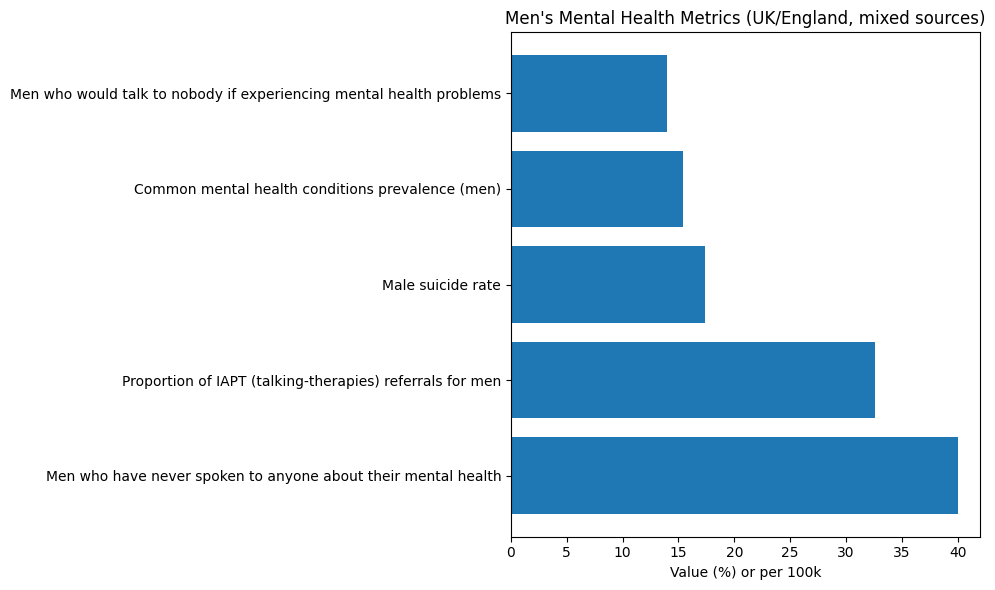

In [3]:
plt.figure(figsize=(10, 6))
plt.barh(df["metric_label"], df["value"])
plt.xlabel("Value (%) or per 100k")
plt.title("Men's Mental Health Metrics (UK/England, mixed sources)")
plt.tight_layout()
# Save
plt.savefig("mh_metrics_bar_chart.png", dpi=300)
plt.show()


In [4]:
prev = df[df["metric_id"] == "cmhc_prevalence_men_pct"]["value"].values[0]
never_spoken = df[df["metric_id"] == "men_never_spoken_pct"]["value"].values[0]
nobody = df[df["metric_id"] == "men_would_talk_to_nobody_pct"]["value"].values[0]
iapt = df[df["metric_id"] == "iapt_referrals_pct_men"]["value"].values[0]

# Data for plot
labels = ["Prevalence (CMHC)", "Never spoken", "Would talk to nobody", "IAPT referrals (men)"]
values = [prev, never_spoken, nobody, iapt]


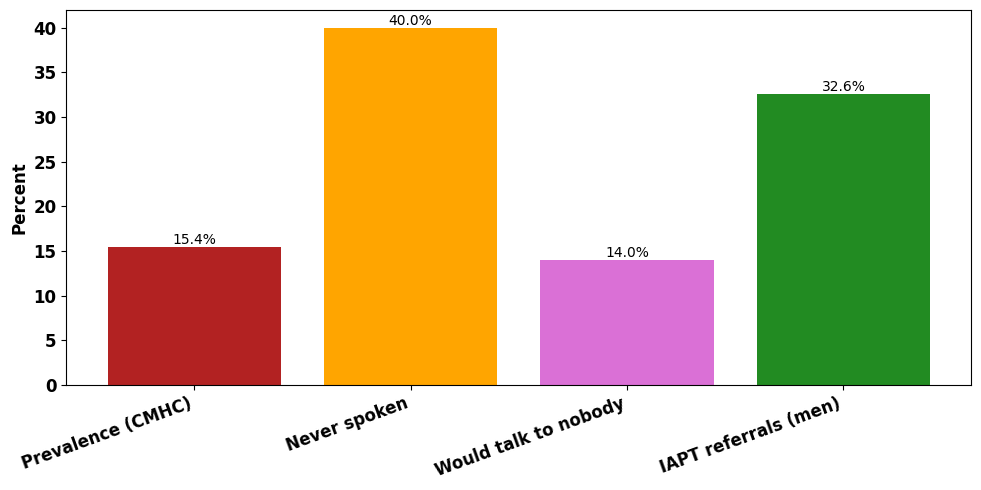

In [8]:
plt.figure(figsize=(10, 5))

colors = ["Firebrick", "Orange", "Orchid", "ForestGreen"]
bars = plt.bar(labels, values, color=colors)

# Add value labels on top of each bar
for bar, val in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{float(val):.1f}%",
        ha="center",
        va="bottom"
    )

plt.ylabel("Percent", fontsize=12, fontweight='bold')
plt.xticks(rotation=20, ha="right", fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()

plt.savefig("../figures/gap_chart.png", dpi=300)
plt.show()
